<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/master/FashionImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.3.0


In [3]:
fashion=keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels)=fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top','Trouser/pants'
,'Pullover shirt'
,'Dress'
,'Coat'
,'Sandal'
,'Shirt'
,'Sneaker','Bag','Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

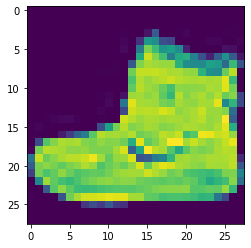

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar
plt.grid(False)
plt.show()

In [12]:
train_images=train_images/255.0
test_images=test_images/255.0

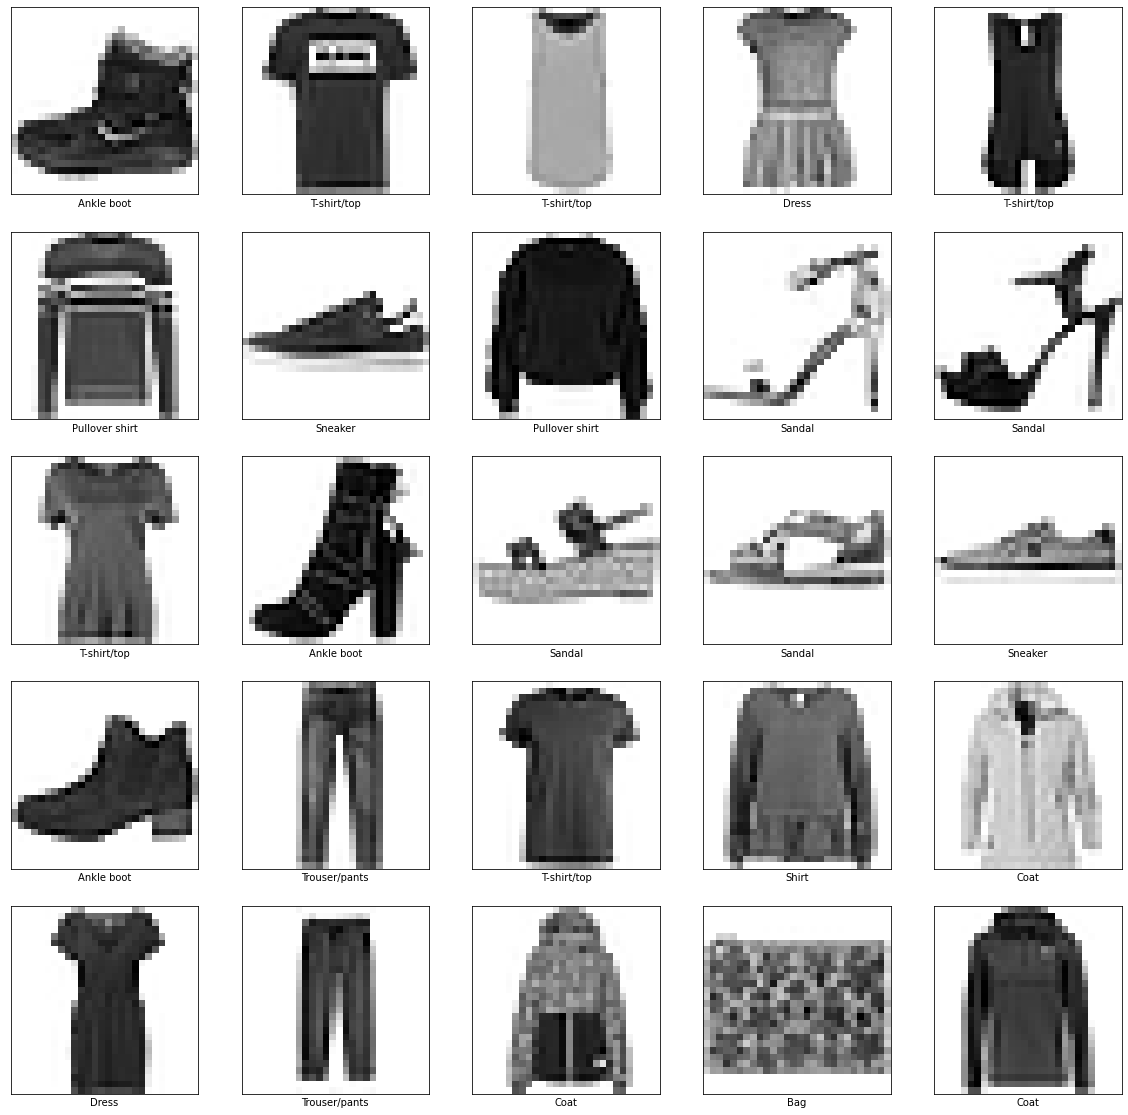

In [13]:
plt.figure (figsize=(20,20))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128,activation=tf.nn.relu), 
    keras.layers.Dense(10,activation=tf.nn.softmax)
 ])

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4985 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2786 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2548 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2441 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [17]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8830
Accuracy:  0.8830000162124634


Accuracy on the test is a little less then the trainin dataset. And this gap is an example of Over-Fitting

In [18]:
prediction=model.predict(test_images)

In [19]:
prediction[0]

array([2.5688769e-09, 5.6419789e-09, 2.3258018e-10, 2.5871083e-10,
       4.6705156e-10, 7.6271506e-04, 2.3955973e-10, 8.6911619e-03,
       2.7130184e-07, 9.9054587e-01], dtype=float32)

In [20]:
np.argmax(prediction[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, prediction_array, true_label, img):
  prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow (img, cmap=plt.cm.binary)
  

  predicted_label =np.argmax(prediction_array)
  if predicted_label == true_label:
      color = "blue"
  else:
      color = "red"
  
  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                        color=color)
  
def plot_value_array(i, prediction_array,true_label):
    prediction_array, true_label = prediction_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0,1])
    prediction_label=np.argmax(prediction_array)

    thisplot[prediction_label].set_color('red')
    thisplot[true_label].set_color('green')
  

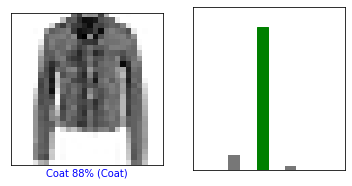

In [23]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,test_labels)
plt.show()


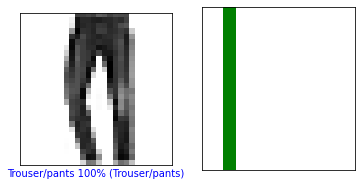

In [24]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,test_labels)
plt.show()


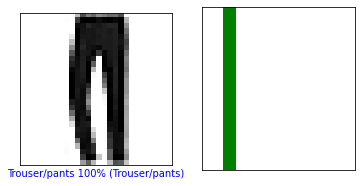

In [25]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,test_labels)
plt.show()


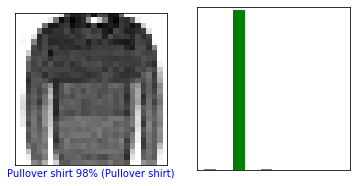

In [26]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,test_labels)
plt.show()


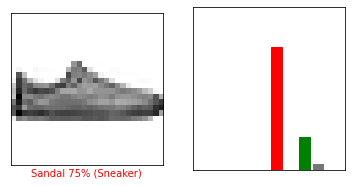

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,test_labels)
plt.show()


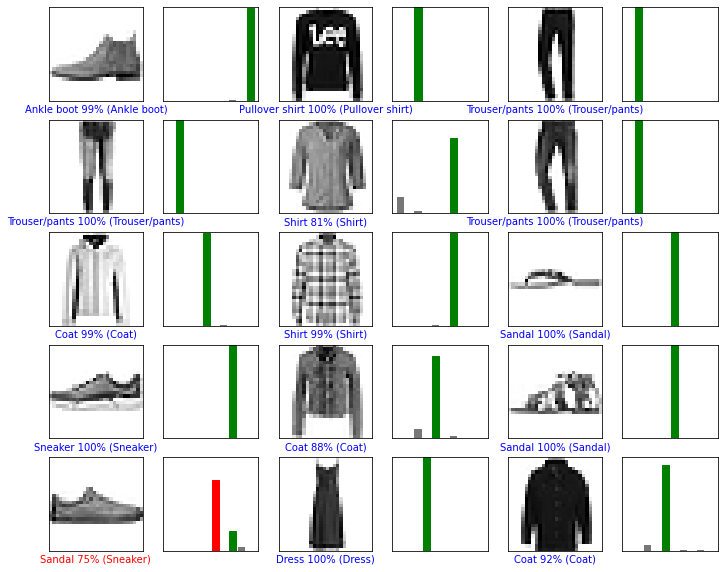

In [28]:
num_rows = 5 
num_cols = 3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols,2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_value_array(i, prediction,test_labels)
plt.show()


In [29]:
img=test_images[0]
print(img.shape)

(28, 28)


In [30]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
prediction_single =model.predict(img)
print(prediction_single)

[[2.5688915e-09 5.6419571e-09 2.3258109e-10 2.5871083e-10 4.6705334e-10
  7.6271611e-04 2.3955882e-10 8.6911572e-03 2.7130341e-07 9.9054587e-01]]


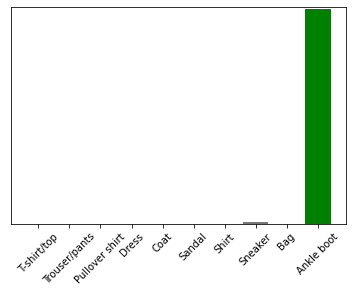

In [32]:
plot_value_array(0, prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(prediction_single[0])

9